# Aprendizaje por refuerzo para entrenar una Red Neuronal para jugar Atari
## Proyecto final de Teoría del Cerebro

### Timothee Givois, Alfredo Carrillo, Didier Muñoz

En este proyecto el objetivo es enseñar a una red neuronal a aprender a jugar un videojuego de Atari.

Para esto se utilizaron las siguientes librerías:

* gym: para simular el videojuego de Atari.
* tensorflow: para construir la red neuronal.

In [1]:
import gym
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

La variable *env* es el objeto creado por gym para simular el videojuego.
El videojuego escogido fue Breakout. Este videojuego tiene 4 acciones posibles y cada observación consiste en la imagen de 210 x 160 pixeles del juego en el momento observado.

In [2]:
env = gym.make('Breakout-v0')
env.reset()
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
print("Action Meaning {}".format(env.unwrapped.get_action_meanings()))

Action Space Discrete(4)
State Space Box(210, 160, 3)
Action Meaning ['NOOP', 'FIRE', 'RIGHT', 'LEFT']


A continuación se muestra la imagen inicial del juego:

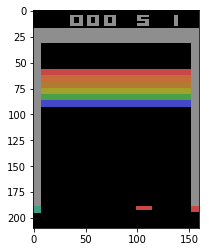

In [3]:
def show_image(board):    
    plt.imshow(board)
    plt.show()

show_image(env.reset())

Parte importante para simplificar un poco el problema, es el preprocesamiento de las imágenes. 
Se construyó la función *preprocess()* para realizar este proceso que consta de lo siguiente:
* Recortar la imagen observada del juego para quitar las partes que no nos interesan (números en la parte superior y marco de la imagen.
* Reducir el tamaño de la imagen.
* Cambiar la imagen a escala de grises.

La imagen inicial del juego ya preprocesada se ve así:

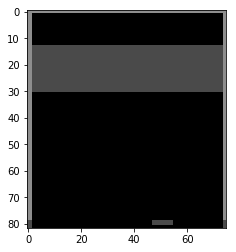

(82, 75, 3)

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def preprocess(image):
    # crop and downsample image
    new_image = image[31:195:2, 5:155:2]
    # change image colors
    #new_image = rgb2gray(new_image)
    # walls should be 142 in rgb and points should be 74
    new_image[np.logical_and(new_image[:,:] != 0, new_image[:,:]!=142)] = 74
    
    return new_image

preprocessed = preprocess(env.reset())
show_image(preprocessed)
np.shape(preprocessed)

A modo de comparación se hizo un modelo dummy con elecciones aleatorias para ver el puntaje que se puede lograr.

In [5]:
class DummyModel:
    def __init__(self, actions):
        self.actions = actions
    def run(self, games, env):

        for game in range(games):
            total_reward = 0
            actions_made = 0
            env.reset()
            while True:
                actions_made += 1
                action = np.random.choice(self.actions)
                state, reward, done, _  = env.step(action)
                total_reward += reward
                if done:
                    print('game: {}/{}, actions_made: {}, score: {}'.format(game, games, actions_made, total_reward))
                    break
   

dummy_model = DummyModel([i for i in range(0, 4)])
dummy_model.run(99, env)

game: 0/99, actions_made: 287, score: 2.0
game: 1/99, actions_made: 237, score: 1.0
game: 2/99, actions_made: 361, score: 4.0
game: 3/99, actions_made: 243, score: 1.0
game: 4/99, actions_made: 247, score: 1.0
game: 5/99, actions_made: 171, score: 0.0
game: 6/99, actions_made: 278, score: 2.0
game: 7/99, actions_made: 172, score: 0.0
game: 8/99, actions_made: 174, score: 0.0
game: 9/99, actions_made: 169, score: 0.0
game: 10/99, actions_made: 182, score: 0.0
game: 11/99, actions_made: 269, score: 2.0
game: 12/99, actions_made: 365, score: 3.0
game: 13/99, actions_made: 202, score: 0.0
game: 14/99, actions_made: 219, score: 1.0
game: 15/99, actions_made: 238, score: 1.0
game: 16/99, actions_made: 315, score: 3.0
game: 17/99, actions_made: 300, score: 3.0
game: 18/99, actions_made: 167, score: 0.0
game: 19/99, actions_made: 319, score: 3.0
game: 20/99, actions_made: 181, score: 0.0
game: 21/99, actions_made: 236, score: 1.0
game: 22/99, actions_made: 221, score: 1.0
game: 23/99, actions_

Se puede ver que se lograron puntajes de a lo más 4, y juegos de longitud 421 pasos.

En Model.py se encuentra el modelo que entrenamos.
Para entrenar la red, la pusimos a jugar 10000 veces.

In [ ]:
%run Model.py

modelo = Model(env.unwrapped.get_action_meanings())
modelo.run(10000, env)

In [ ]:
game: 0/10000, actions_made: 408, score: 4.0
game: 1/10000, actions_made: 174, score: 0.0
game: 2/10000, actions_made: 411, score: 4.0
game: 3/10000, actions_made: 209, score: 1.0
game: 4/10000, actions_made: 220, score: 1.0
game: 5/10000, actions_made: 234, score: 1.0
game: 6/10000, actions_made: 315, score: 2.0
game: 7/10000, actions_made: 228, score: 1.0
game: 8/10000, actions_made: 321, score: 3.0
game: 9/10000, actions_made: 212, score: 1.0
game: 10/10000, actions_made: 173, score: 0.0
game: 11/10000, actions_made: 295, score: 2.0
game: 12/10000, actions_made: 414, score: 4.0
game: 13/10000, actions_made: 195, score: 0.0
game: 14/10000, actions_made: 240, score: 1.0
game: 15/10000, actions_made: 173, score: 0.0
game: 16/10000, actions_made: 177, score: 0.0
game: 17/10000, actions_made: 298, score: 2.0
game: 18/10000, actions_made: 181, score: 0.0
game: 19/10000, actions_made: 195, score: 0.0
game: 20/10000, actions_made: 164, score: 0.0
...
game: 4778/10000, actions_made: 1996, score: 0.0
game: 4781/10000, actions_made: 1943, score: 10.0
game: 4786/10000, actions_made: 1950, score: 0.0
game: 4793/10000, actions_made: 1124, score: 0.0
game: 4794/10000, actions_made: 732, score: 0.0
game: 4797/10000, actions_made: 1217, score: 2.0
game: 4800/10000, actions_made: 886, score: 0.0
game: 4807/10000, actions_made: 1566, score: 0.0
game: 4812/10000, actions_made: 1711, score: 0.0
game: 4817/10000, actions_made: 1919, score: 1.0
game: 4819/10000, actions_made: 1699, score: 0.0
game: 4827/10000, actions_made: 1473, score: 0.0
game: 4828/10000, actions_made: 1346, score: 4.0
game: 4831/10000, actions_made: 1856, score: 0.0
game: 4832/10000, actions_made: 1942, score: 3.0
game: 4841/10000, actions_made: 1041, score: 1.0
game: 4854/10000, actions_made: 1695, score: 1.0
...
game: 4708/10000, actions_made: 1994, score: 0.0
game: 4712/10000, actions_made: 1549, score: 0.0
game: 4713/10000, actions_made: 1699, score: 0.0
game: 4717/10000, actions_made: 1543, score: 1.0
game: 4727/10000, actions_made: 1229, score: 0.0
game: 4729/10000, actions_made: 1447, score: 2.0
game: 4736/10000, actions_made: 945, score: 0.0
game: 4740/10000, actions_made: 447, score: 0.0
game: 4745/10000, actions_made: 1470, score: 0.0
game: 4748/10000, actions_made: 1722, score: 0.0
game: 4752/10000, actions_made: 1558, score: 0.0
game: 4753/10000, actions_made: 1765, score: 2.0
game: 4755/10000, actions_made: 1496, score: 0.0
game: 4756/10000, actions_made: 1072, score: 0.0
game: 4757/10000, actions_made: 1336, score: 0.0
game: 4758/10000, actions_made: 1832, score: 2.0
game: 4761/10000, actions_made: 1306, score: 2.0
game: 4766/10000, actions_made: 1240, score: 0.0
game: 4774/10000, actions_made: 1823, score: 0.0
game: 4777/10000, actions_made: 1770, score: 2.0
game: 4778/10000, actions_made: 1996, score: 0.0
game: 4781/10000, actions_made: 1943, score: 10.0

Como podemos ver, el agente aprendió poco a poco haciendo juegos cada vez más largos y en su mejor juego hizo un resultado de 10 puntos.

## Sobre el modelo

###### A continuación se explicará el funcionamiento del contenido de *Model.py*

Todo está contenido dentro de una clase llamada *Model* cuyo constructor es el siguiente:

In [ ]:
class Model:
    def __init__(self, actions, gamma=.1, epsilon=1, epsilon_decay=.9995, min_epsilon=.1, session=None, learning_rate=.1):

        self.actions = [x for x in range(len(actions))]
        # exploit vs explore value
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay

        # deep learning neural network attributes
        self.gamma = gamma
        self.actions_made = []
        self.min_epsilon = min_epsilon
        self.learning_rate = learning_rate
        self.model = self._build_model()


        if session is None:
            self.session = tf.InteractiveSession()
        else:
            self.session = session
        self.session.run(tf.global_variables_initializer())

Se pueden distinguir las siguientes inicializaciones:
* El conjunto de acciones posibles es un parámetro obligatorio del constructor y se guardan como una lista de índices.
* Los parámetros que controlan la razón entre explorar nuevos valores y utilizar lo ya aprendido.
* Los parámetros relacionados con el proceso de aprendizaje de la red neuronal.
* La sesión de Tensorflow.

Cabe mencionar que el modelo en sí se construye en la línea *self.model = self._build_model()* done la función invocada es como sigue:

In [ ]:
    def _build_model(self):
        # first layer
        self.xT = tf.placeholder(tf.uint8, shape=(None, 82, 75, 3), name="x")
        self.yT = tf.placeholder(tf.float32, shape=(None), name="y")
        self.actionsT = tf.placeholder(tf.int32, shape=(None), name="actions")

        # x_normalized = tf.to_float(x) / 255.0
        X = tf.to_float(self.xT) / 255.0
        batch_size = tf.shape(X)[0]

        # 3 conv networks
        conv1 = tf.contrib.layers.conv2d(
            X, 32, 8, 4, activation_fn=tf.nn.relu)
        conv2 = tf.contrib.layers.conv2d(
            conv1, 64, 4, 2, activation_fn=tf.nn.relu)
        conv3 = tf.contrib.layers.conv2d(
            conv2, 64, 3, 1, activation_fn=tf.nn.relu)

        # 2 fully connected layers
        flattened = tf.contrib.layers.flatten(conv3)
        fc1 = tf.contrib.layers.fully_connected(flattened, 512)
        predictions = tf.contrib.layers.fully_connected(fc1, len(self.actions))

        # optimizer for the nn
        gather_indices = tf.range(batch_size) * tf.shape(predictions)[1] + self.actionsT
        self.action_predictions = tf.gather(tf.reshape(predictions, [-1]), gather_indices)
        
        self.losses = tf.squared_difference(self.yT, self.action_predictions)
        self.loss = tf.reduce_mean(self.losses)
        
        optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate)

        self.train_op = optimizer.minimize(self.loss, global_step=tf.contrib.framework.get_global_step())

        return predictions

Siguiendo los resultados obtenidos en el artículo "Playing Atari With Deep Reinforcement Learning", la arquitectura es como sigue:
* Tres capas convolucionales: 32 filtros de 8x8, 64 filtros de 4x4 y 64 filtros de 3x3
* Dos capas totalmente conexas: 1 capa oculta y 1 capa de salida.

La función principal de la clase *Model* es la función *run()* que precisamente ejecuta el entrenamiento:

In [ ]:
    def run(self, games, env):
        max_reward = 0
        max_game = 0
        max_actions_made = 0
        for game in range(games):
            total_reward = 0
            state = self.preprocess_image(env.reset())
            while True:
                # get the next action
                action = self.explore_or_exploit(state)

                # act
                next_state, reward, done, _ = env.step(action)
                total_reward += reward
                state = self.preprocess_image(next_state)
                self.save_current_state(state, action, total_reward, self.preprocess_image(next_state), done)
                # get next_state

                # if finished, tell me it finished
                if done:
                    if total_reward >= max_reward:
                        max_game = game
                        max_actions_made = len(self.actions_made)
                        max_reward = total_reward
                    print('game: {}/{}, actions_made: {}, score: {}'.format(game, games, len(self.actions_made), total_reward))
                    break

            self.fit_nn()
            self.actions_made = []
            self.epsilon = self.epsilon * self.epsilon_decay if self.epsilon * self.epsilon_decay > self.min_epsilon else self.min_epsilon
        print("\n\nBest game {}, actions_made: {}, score {}".format(max_game, max_actions_made, max_reward))

El proceso general se puede ver de la siguiente manera:
    
Para cada juego que se vaya a jugar:
1. Reinicia el simulador.
2. Escoge una acción a realizar.
3. Simula el juego con esa acción y obtiene una observación.
4. La observación es preprocesada.
5. Se guarda el estado actual del juego incluyendo: imagen preprocesada, acción realizada, recompensa total, y una bandera indicando si el juego llegó a un punto de terminación.
6. Si el juego ha terminado se imprimen los resultados.

Al terminar de jugar el juego y antes de empezar el siguiente:
1. Actualiza los pesos de la red neuronal al llamar a la función fit_nn().
2. Limpia la lista de acciones realizadas.
3. Actualiza el *epsilon* que se utiliza para decidir entre explorar y explotar conocimiento.

De las funciones invocadas las más importantes se muestran a continuación.

La función *explore_or_exploit* se encarga de decidir si al escoger una acción el modelo va a explorar agarrando de forma aleatoria la función o si va a aprovechar el conocimiento ya obtenido:

In [12]:
    def explore_or_exploit(self, state):
        if np.random.binomial(1, self.epsilon):
            action = np.random.choice(self.actions)
        else:
            action = np.argmax(self.predict(state)[0])
        return action

La función *fit_nn()* se encarga de entrenar la red con las acciones y los resultados obtenidos en el último juego. En ella se puede observar que sólo se toma el 10% de las acciones realizadas durante el juego, las cuales se escogen con un muestreo aleatorio.

Para cada acción muestreada se define el valor objetivo y se actualizan los pesos de la red al llamar a la función *self.update(states, actionsT, targets)*.

In [13]:
    def fit_nn(self):
        batch_size = int(len(self.actions_made)*.1) # 10% of actions made
        indexes = np.random.randint(0, len(self.actions_made), batch_size)
        actions_sampled = [self.actions_made[x] for x in indexes]
        states = []
        actionsT = []
        targets = []

        for state, action, reward, next_state, done in actions_sampled:
            target = reward
            if not done:
                target = reward + self.gamma * np.argmax(self.predict(next_state))
            
            states.append(state)
            actionsT.append(action)
            targets.append(target)
            
        self.update(states, actionsT, targets)

El contenido de la función update es:

In [ ]:
    def update(self, s, a, y):
        states_reshaped = np.array(s).reshape(len(s), 82, 75, 3)
        feed_dict = { self.xT: states_reshaped, self.yT: y, self.actionsT: a }

        loss, _ = self.session.run([self.loss, self.train_op], feed_dict=feed_dict)

        return loss

Nótese que se invoca a *self.loss* y a *self.train_op* que se encargan de calcular el error y de entrenar la red a partir del mismo.

## Ejecución en Microsoft Azure

Para ejecutar el código en una instancia con GPU en Amazon Azure se utilizó el código siguiente:

In [ ]:
import tensorflow as tf
import gym

from Model import Model

env = gym.make('Breakout-v0')
env.reset()

config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allocator_type = 'BFC'

config.gpu_options.allow_growth = True

with tf.Session(config=config) as session:
    modelo = Model(env.unwrapped.get_action_meanings(), session)
    saver = tf.train.Saver()
    modelo.run(10000, env)
    save_path = saver.save(session, 'saved_model.ckpt')

Este código agrega directivas de configuración para el uso de GPU y al final guarda el modelo.